In [316]:
#!pip install autogluon
#!pip install pandas

In [317]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection._split import _BaseKFold
from sklearn.model_selection import train_test_split

import numpy as np
import random

In [318]:
seed_value = 42  # Replace with your desired seed value
random.seed(seed_value)
np.random.seed(seed_value)

In [319]:
x_train_a = pd.read_csv('cleaned_data_quarterly/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data_quarterly/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data_quarterly/A/x_test_a.csv')

In [320]:
x_train_a

,date_forecast,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,...,forecast_day,forecast_hour,calc_year,calc_month,calc_day,calc_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3
0,2019-06-02 22:00:00,7.7,7.7,7.7,7.7,1.230,1.229,1.228,1.226,1744.9,...,2,22,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
1,2019-06-02 23:00:00,7.7,7.7,7.7,7.7,1.225,1.224,1.223,1.222,1703.6,...,2,23,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
2,2019-06-03 00:00:00,7.7,7.8,7.9,8.1,1.221,1.220,1.219,1.219,1668.1,...,3,0,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,-0.0000
3,2019-06-03 01:00:00,8.2,8.4,8.5,8.6,1.218,1.218,1.218,1.218,1388.4,...,3,1,NaN,NaN,NaN,NaN,-0.0000,-0.0,-0.0,0.0000
4,2019-06-03 02:00:00,8.8,8.9,9.0,9.1,1.219,1.218,1.218,1.217,1108.5,...,3,2,NaN,NaN,NaN,NaN,0.0000,0.0,0.0,2.8638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,2023-04-30 19:00:00,4.6,4.6,4.5,4.5,1.275,1.276,1.277,1.278,1633.0,...,30,19,2023.0,4.0,29.0,7.0,0.7652,0.0,-0.0,-0.0000
34057,2023-04-30 20:00:00,4.5,4.5,4.5,4.5,1.279,1.280,1.280,1.280,1742.9,...,30,20,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000
34058,2023-04-30 21:00:00,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1794.9,...,30,21,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000
34059,2023-04-30 22:00:00,4.5,4.5,4.5,4.5,1.281,1.281,1.281,1.281,1532.9,...,30,22,2023.0,4.0,29.0,7.0,-0.0000,-0.0,-0.0,-0.0000


In [321]:
x_train_a_combined = x_train_a.merge(y_train_a, left_on='date_forecast', right_on='time', how='left')
x_train_a_combined['observed'] = x_train_a_combined['calc_year'].isna().astype(int)
train_data_a = x_train_a_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour','snow_density:kgm3_Q0','snow_density:kgm3_Q1','snow_density:kgm3_Q2','snow_density:kgm3_Q3'], axis = 1)
x_test_a['observed'] = x_test_a['calc_year'].isna().astype(int)
test_data_a = x_test_a.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour','date_forecast','location'], axis = 1)

In [322]:
test_data_a

,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,ceiling_height_agl:m_Q1,...,wind_speed_w_1000hPa:ms_Q3,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3,observed
0,4.4,4.3,4.3,4.3,1.286,1.287,1.287,1.287,912.7,912.7,...,-0.0,2023,5,1,0,-0.0000,-0.000000,-0.00000,-0.00000,0
1,4.3,4.3,4.3,4.2,1.287,1.286,1.286,1.285,NaN,1482.1,...,-0.0,2023,5,1,1,-0.0000,-0.000000,-0.00000,-0.00000,0
2,4.2,4.2,4.1,4.1,1.284,1.284,1.284,1.283,1482.1,1688.2,...,-0.0,2023,5,1,2,-0.0000,-0.000000,-0.00000,-0.00000,0
3,4.1,4.0,4.0,4.0,1.282,1.282,1.282,1.282,2306.7,2310.8,...,-0.0,2023,5,1,3,-0.0000,0.000000,5.46000,20.74660,0
4,3.9,3.9,3.9,3.9,1.282,1.281,1.281,1.280,2323.2,2239.9,...,-0.0,2023,5,1,4,56.0670,125.151596,243.34549,419.51752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,8.3,8.3,8.4,8.4,1.196,1.197,1.198,1.198,3691.0,3656.3,...,0.0,2023,7,3,19,160.1557,131.985000,100.58850,58.52950,0
716,8.4,8.5,8.6,8.6,1.199,1.200,1.201,1.202,3552.1,3552.1,...,0.0,2023,7,3,20,31.5776,15.477500,6.71750,2.01120,0
717,8.7,8.8,8.9,8.9,1.203,1.204,1.205,1.206,NaN,2315.0,...,0.0,2023,7,3,21,0.0000,-0.000000,-0.00000,-0.00000,0
718,9.0,9.0,9.0,9.1,1.207,1.207,1.207,1.207,2315.0,2240.2,...,0.0,2023,7,3,22,-0.0000,-0.000000,-0.00000,-0.00000,0


# Trying with validation set equal to half of the estimated data


In [323]:
train_data_a.drop(columns= ['index'], inplace= True)

In [324]:
test_data_a['snow_density:kgm3_Q0'] = np.nan
test_data_a['snow_density:kgm3_Q1'] = np.nan
test_data_a['snow_density:kgm3_Q2'] = np.nan
test_data_a['snow_density:kgm3_Q3'] = np.nan

In [325]:
observed_zero = train_data_a[train_data_a['observed'] == 0]
observed_zero['forecast_month'].unique()

array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [326]:
from sklearn.model_selection import train_test_split

def split_dataset(train_data, date_column='forecast_month', observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set includes approximately 50% of the estimated data, evenly distributed across months.
    Additionally, it includes about half of the observed data for May, June, and July, if present.
    The training set includes all months, excluding the observed data that is included in the validation set.
    
    :param train_data: The original training dataset as a pandas DataFrame.
    :param date_column: The name of the column that contains the month information.
    :param observed_column: The name of the column that indicates if the data is observed.
    :return: A tuple (training_set, validation_set)
    """
    # Work with a copy to avoid modifying the original DataFrame
    train_data = train_data.copy()
    train_data.sort_values(by='date_forecast', inplace=True)
    
    # Separate observed and estimated data
    estimated_data = train_data[train_data[observed_column] == 0]
    observed_data = train_data[train_data[observed_column] != 0]
    
    # Split the estimated data into training and validation sets
    estimated_train, estimated_val = train_test_split(
        estimated_data, test_size=0.5, random_state=42, stratify=estimated_data[date_column]
    )
    
    # Check if there are any observed data for May, June, and July
    if not observed_data[observed_data[date_column].isin([5, 6, 7])].empty:
        print("hellooo")
        observed_may_june_july = observed_data[observed_data[date_column].isin([5, 6, 7])]
        observed_train_mjj, observed_val_mjj = train_test_split(
            observed_may_june_july, test_size=0.5, random_state=42, stratify=observed_may_june_july[date_column]
        )
    else:
        
        observed_train_mjj = pd.DataFrame()
        observed_val_mjj = pd.DataFrame()
    
    # Combine the estimated and observed May, June, July data for the validation set
    validation_set = pd.concat([estimated_val, observed_val_mjj])
    validation_set.sort_values(by='date_forecast', inplace=True)
    
    # The rest of the observed data (excluding May, June, July) will be added to the training set
    observed_rest = observed_data[~observed_data[date_column].isin([5, 6, 7])]
    
    # Combine all training parts for the final training set
    training_set = pd.concat([estimated_train, observed_train_mjj, observed_rest])
    training_set.sort_values(by='date_forecast', inplace=True)
    
    return training_set, validation_set

# Create a copy of the DataFrame to pass to the function
# train_data_copy = train_data_a.copy()
# train_data_a, val_data_a = split_dataset(train_data_copy, 'forecast_month', 'observed')

# print(len(train_data_a))
# print(len(val_data_a))

In [327]:
train_data_a.drop(columns=['date_forecast'],inplace=True)
# val_data_a.drop(columns=['date_forecast'],inplace=True)

In [334]:
train_data_a.head()

,absolute_humidity_2m:gm3_Q0,absolute_humidity_2m:gm3_Q1,absolute_humidity_2m:gm3_Q2,absolute_humidity_2m:gm3_Q3,air_density_2m:kgm3_Q0,air_density_2m:kgm3_Q1,air_density_2m:kgm3_Q2,air_density_2m:kgm3_Q3,ceiling_height_agl:m_Q0,ceiling_height_agl:m_Q1,...,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation_Q0,direct_rad_x_sun_elevation_Q1,direct_rad_x_sun_elevation_Q2,direct_rad_x_sun_elevation_Q3,pv_measurement,observed
0,7.7,7.7,7.7,7.7,1.230,1.229,1.228,1.226,1744.9,1734.0,...,2019,6,2,22,-0.0,-0.0,-0.0,-0.0000,0.00,1
1,7.7,7.7,7.7,7.7,1.225,1.224,1.223,1.222,1703.6,1694.2,...,2019,6,2,23,-0.0,-0.0,-0.0,-0.0000,0.00,1
2,7.7,7.8,7.9,8.1,1.221,1.220,1.219,1.219,1668.1,1598.2,...,2019,6,3,0,-0.0,-0.0,-0.0,-0.0000,0.00,1
3,8.2,8.4,8.5,8.6,1.218,1.218,1.218,1.218,1388.4,1318.4,...,2019,6,3,1,-0.0,-0.0,-0.0,0.0000,0.00,1
4,8.8,8.9,9.0,9.1,1.219,1.218,1.218,1.217,1108.5,1038.5,...,2019,6,3,2,0.0,0.0,0.0,2.8638,19.36,1


In [329]:
#predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a,verbosity = 2, time_limit= 1500)
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a,verbosity = 2, excluded_model_types=['CatBoost'],presets='best_quality', time_limit= 1500)

No path specified. Models will be saved in: "AutogluonModels\ag-20231107_175352\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1500s
AutoGluon will save models to "AutogluonModels\ag-20231107_175352\"
AutoGluon Version:  0.8.2
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   691.95 GB / 1022.87 GB (67.6%)
Train Data Rows:    34061
Train Data Columns: 189
Label Column: pv_measurement
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (5733.42, 0.0, 631.01116, 1166.20607)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: [

[1000]	valid_set's l1: 160.871
[2000]	valid_set's l1: 155.607
[3000]	valid_set's l1: 153.202
[4000]	valid_set's l1: 151.984
[5000]	valid_set's l1: 151.278
[6000]	valid_set's l1: 150.588
[7000]	valid_set's l1: 150.279
[8000]	valid_set's l1: 149.972
[9000]	valid_set's l1: 149.611
[10000]	valid_set's l1: 149.423
[1000]	valid_set's l1: 162.625
[2000]	valid_set's l1: 157.822
[3000]	valid_set's l1: 155.61
[4000]	valid_set's l1: 154.273
[5000]	valid_set's l1: 153.274
[6000]	valid_set's l1: 152.779
[7000]	valid_set's l1: 152.429
[8000]	valid_set's l1: 152.149
[9000]	valid_set's l1: 151.753
[10000]	valid_set's l1: 151.547
[1000]	valid_set's l1: 162.289
[2000]	valid_set's l1: 157.334
[3000]	valid_set's l1: 154.633
[4000]	valid_set's l1: 153.322
[5000]	valid_set's l1: 152.419
[6000]	valid_set's l1: 151.821
[7000]	valid_set's l1: 151.363
[8000]	valid_set's l1: 151.061
[9000]	valid_set's l1: 150.882
[10000]	valid_set's l1: 150.64
[1000]	valid_set's l1: 159.457
[2000]	valid_set's l1: 154.141
[3000]	

	-151.9013	 = Validation score   (-mean_absolute_error)
	275.18s	 = Training   runtime
	6.17s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 706.75s of the 1206.43s of remaining time.
	Memory not enough to fit LGBModel folds in parallel. Will do sequential fitting instead. 	Consider decreasing folds trained in parallel by passing num_folds_parallel to ag_args_ensemble when calling predictor.fit
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 164.978
[2000]	valid_set's l1: 161.482
[3000]	valid_set's l1: 160.496
[4000]	valid_set's l1: 160.125
[5000]	valid_set's l1: 160.007
[6000]	valid_set's l1: 159.853
[7000]	valid_set's l1: 159.794
[8000]	valid_set's l1: 159.799
[9000]	valid_set's l1: 159.797
[10000]	valid_set's l1: 159.77
[1000]	valid_set's l1: 164.297
[2000]	valid_set's l1: 162.292
[3000]	valid_set's l1: 161.677
[4000]	valid_set's l1: 161.337
[5000]	valid_set's l1: 161.148
[6000]	valid_set's l1: 161.053
[7000]	valid_set's l1: 160.998
[8000]	valid_set's l1: 160.95
[9000]	valid_set's l1: 160.949
[10000]	valid_set's l1: 160.935
[1000]	valid_set's l1: 164.323
[2000]	valid_set's l1: 161.898
[3000]	valid_set's l1: 161.202
[4000]	valid_set's l1: 160.727
[5000]	valid_set's l1: 160.553
[6000]	valid_set's l1: 160.423
[7000]	valid_set's l1: 160.359
[8000]	valid_set's l1: 160.351
[9000]	valid_set's l1: 160.33
[10000]	valid_set's l1: 160.326
[1000]	valid_set's l1: 163.603
[2000]	valid_set's l1: 160.798
[3000]	v

	-161.6915	 = Validation score   (-mean_absolute_error)
	370.78s	 = Training   runtime
	7.06s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 323.75s of the 823.44s of remaining time.
	-180.3131	 = Validation score   (-mean_absolute_error)
	119.09s	 = Training   runtime
	4.65s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 199.32s of the 699.0s of remaining time.
	Memory not enough to fit CatBoostModel folds in parallel. Will do sequential fitting instead. 	Consider decreasing folds trained in parallel by passing num_folds_parallel to ag_args_ensemble when calling predictor.fit
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 963.
	Ran out of time, early stopping on iteration 1009.
	Ran out of time, early stopping on iteration 1065.
	Ran out of time, early stopping on iteration 1184.
	Ran out of time, early stopping on iteratio

In [330]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-149.188938,32.432311,1392.113622,0.000996,0.369072,3,True,16
1,ExtraTreesMSE_BAG_L2,-150.163459,27.041173,997.323558,4.195550,40.895635,2,True,12
2,XGBoost_BAG_L2,-151.234774,23.147140,979.282969,0.301517,22.855047,2,True,14
3,WeightedEnsemble_L2,-151.455597,13.237985,646.281267,0.000000,0.313442,2,True,7
4,RandomForestMSE_BAG_L2,-151.651290,27.150475,1068.001251,4.304852,111.573328,2,True,10
5,LightGBMXT_BAG_L1,-151.901258,6.174702,275.184407,6.174702,275.184407,1,True,3
6,CatBoost_BAG_L2,-152.007170,22.951064,1010.092329,0.105441,53.664407,2,True,11
7,NeuralNetFastAI_BAG_L2,-152.266179,23.523954,1162.756133,0.678331,206.328211,2,True,13
8,LightGBM_BAG_L2,-152.392072,23.002668,970.579245,0.157045,14.151322,2,True,9
9,LightGBMXT_BAG_L2,-154.741510,23.079154,976.743476,0.233531,20.315554,2,True,8


In [331]:
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 
y_pred_a #print the DataFrame

,pv_measurement
0,0.507190
1,0.655874
2,1.273548
3,61.367477
4,312.321259
...,...
715,220.451492
716,97.119820
717,5.106444
718,1.633427


In [332]:
import os
output_dir = 'autogluon'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the dataframes into the folder
y_pred_a.to_csv(os.path.join(output_dir, 'y_pred_a.csv'))

In [333]:
pred_a_whole = predictor_a.predict(train_data_a)
pred_a_whole=pd.DataFrame(pred_a_whole,columns=['pv_measurement'])
pred_a_whole


KeyboardInterrupt: 

In [ ]:
y_train_a

,time,index,pv_measurement
0,2019-06-02 22:00:00,0,0.00
1,2019-06-02 23:00:00,1,0.00
2,2019-06-03 00:00:00,2,0.00
3,2019-06-03 01:00:00,3,0.00
4,2019-06-03 02:00:00,4,19.36
...,...,...,...
34056,2023-04-30 19:00:00,34080,9.02
34057,2023-04-30 20:00:00,34081,0.00
34058,2023-04-30 21:00:00,34082,0.00
34059,2023-04-30 22:00:00,34083,0.00


In [ ]:
import matplotlib.pyplot as plt
time_values = y_train_a['time']

# Calculate residuals
residuals = y_train_a['pv_measurement'] - pred_a_whole['pv_measurement']

# Plot actual vs. predicted values over time
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual vs predicted values over time
plt.scatter(time_values, y_train_a['pv_measurement'], alpha=0.5, label='Actual', color='blue')
plt.scatter(time_values, pred_a_whole['pv_measurement'], alpha=0.5, label='Predicted', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values over Time')
plt.legend()
plt.show()

ValueError: x and y must be the same size

Error in callback <function flush_figures at 0x000001B8678BF790> (for post_execute):


KeyboardInterrupt: 

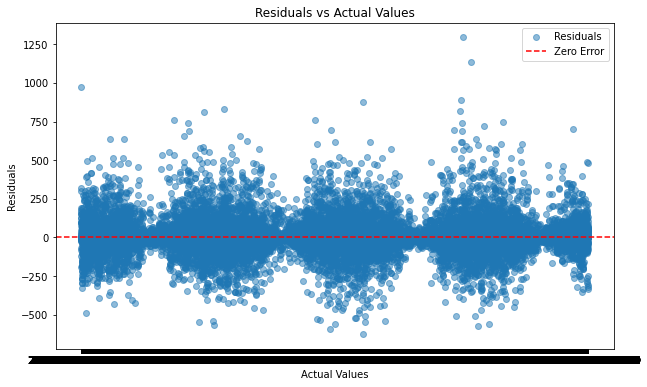

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(time_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')  # Line for zero residual error
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.legend()
plt.show()

In [ ]:
# tscv = TimeSeriesSplit(n_splits=5)

# performance_metrics = []


# for train_idx, test_idx in tscv.split(x_train_a):
#     x_train_fold = x_train_a.iloc[train_idx]
#     y_train_fold = y_train_a.iloc[train_idx]
#     x_valid_fold = x_train_a.iloc[test_idx]
#     y_valid_fold = y_train_a.iloc[test_idx]

#     # Merge the data on the date
#     train_data_combined = x_train_fold.merge(y_train_fold, left_on='date_forecast', right_on='time', how='left')
#     valid_data_combined = x_valid_fold.merge(y_valid_fold, left_on='date_forecast', right_on='time', how='left')

#     # Drop redundant columns
#     train_data_combined.drop(columns=['time'], inplace=True)
#     valid_data_combined.drop(columns=['time'], inplace=True)


#     # Define the name of the target column
#     label = 'pv_measurement'  # Replace with the name of your target column
    
#     # Train the model
#     predictor = TabularPredictor(label=label, eval_metric= 'mean_absolute_error').fit(train_data_combined,tuning_data= valid_data_combined, time_limit= 900)
    
#     # Validate the model
#     performance = predictor.evaluate(valid_data_combined)
    
#     # Evaluate the performance (you can use any metric of your choice)

#     performance_metrics.append(performa)



No path specified. Models will be saved in: "AutogluonModels\ag-20231103_121524\"
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels\ag-20231103_121524\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   694.73 GB / 1022.87 GB (67.9%)
Train Data Rows:    5685
Train Data Columns: 66
Tuning Data Rows:    5680
Tuning Data Columns: 66
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed 

	Available Memory:                    5779.59 MB
	Train Data (Original)  Memory Usage: 6.77 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\features\generators\fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGen

NameError: name 'performa' is not defined

In [ ]:

residuals = y_train_a - pred_a_whole
residuals_with_time = residuals.rename(columns= {'pv_measurement':'residuals'})
residuals_with_time['time'] = time_values
residuals_with_time

residuals_with_time.set_index('time')

,residuals
time,
2019-06-02 22:00:00,0.269903
2019-06-02 23:00:00,0.122004
2019-06-03 00:00:00,0.191612
2019-06-03 01:00:00,-1.080068
2019-06-03 02:00:00,-19.738022
...,...
2023-04-30 19:00:00,2.064701
2023-04-30 20:00:00,-0.202846
2023-04-30 21:00:00,-0.049184


In [ ]:
outliers = residuals_with_time[(residuals_with_time['residuals'] > 500) | (residuals_with_time['residuals'] < -400)]
inliers = residuals_with_time[(residuals_with_time['residuals'] <= 500) | (residuals_with_time['residuals'] >= -400)]

outliers.set_index('time')



NameError: name 'residuals_with_time' is not defined

In [ ]:
train_data_a_copy = train_data_a
train_data_a_copy['time'] = x_train_a_combined['date_forecast']
train_data_a_copy.merge(outliers,on='time')

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation,pv_measurement,observed,time,residuals
0,8.950,1.19900,4060.875,11783602.0,822.500000,4060.875,0.0,282.875,211.300000,2662814.2,...,0.0,2019,6,4,11,12465.916000,4339.72,1,2019-06-04 11:00:00,976.092559
1,11.475,1.17850,2997.900,10495266.0,767.550000,2997.900,0.0,286.875,151.025000,2069067.9,...,0.0,2019,6,16,9,23054.926000,3253.36,1,2019-06-16 09:00:00,-487.213242
2,6.425,1.22850,1398.325,11846065.0,810.400000,1398.325,0.0,277.700,243.600000,3437885.2,...,0.0,2019,7,2,12,3761.031500,3530.78,1,2019-07-02 12:00:00,515.830293
3,7.900,1.20550,3086.100,8838911.0,638.550050,3086.100,0.0,281.000,212.175000,2414230.5,...,0.0,2019,8,22,10,10775.086000,3609.54,1,2019-08-22 10:00:00,637.752402
4,10.925,1.20400,1245.700,8480092.0,574.575000,1245.700,0.0,285.650,109.250000,1850785.8,...,0.0,2019,9,1,12,820.950560,3800.50,1,2019-09-01 12:00:00,513.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,7.450,1.20450,NaN,4983308.0,311.850000,1293.100,0.0,280.000,77.775000,1141199.0,...,0.0,2022,9,28,13,3976.922900,666.60,1,2022-09-28 13:00:00,-452.478613
118,6.900,1.22300,NaN,4278830.0,334.975000,NaN,0.0,278.775,65.975000,926758.1,...,0.0,2022,9,29,9,5449.697800,1609.96,1,2022-09-29 09:00:00,-419.385703
119,7.050,1.23375,4061.550,3763708.0,244.049990,895.900,0.0,278.850,81.475006,1206331.0,...,0.0,2022,10,15,12,24.004026,1973.62,1,2022-10-15 12:00:00,566.998174
120,6.200,1.26750,1165.150,1181184.1,120.100006,908.700,0.0,276.975,54.399998,537542.2,...,0.0,2022,10,20,8,42.163795,1942.16,1,2022-10-20 08:00:00,605.949307


In [ ]:
import os

# Store the cleaned datasets
output_dir = 'cleaned_data'
# Ensure directory exists, if not create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Directories for each location
dir_a = os.path.join(output_dir, 'A')
dir_b = os.path.join(output_dir, 'B')
dir_c = os.path.join(output_dir, 'C')

# Ensure subdirectories exist
for dir_path in [dir_a, dir_b, dir_c]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)



# Saving datasets for location A
x_train_a_hourly.to_csv(os.path.join(dir_a, 'x_train_a.csv'))
x_test_a_hourly.to_csv(os.path.join(dir_a, 'x_test_a.c

No path specified. Models will be saved in: "AutogluonModels\ag-20231026_153540\"


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│                                                                                                  │
│   1 # Begin with A                                                                               │
│   2                                                                                              │
│ ❱ 3 predictor = TabularPredictor(label='pv_measurement').fit(train_data=x_train, tuning_data     │
│   4 predictions = predictor.predict()  # Assuming x_test is your test data                       │
│   5                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'x_train' is not defined